In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_fuel_statewide = pd.read_excel('../../../data/raw/ce2.1.st.xlsx', sheet_name="physical units")
df_household_fuel = pd.read_excel('../../../data/raw/ACSDP5Y2020.DP04-2023-10-24T140337.xlsx', sheet_name="Data")
df_household_fuel_five_towns = pd.read_excel('../../../data/raw/ACSDP5Y2020.DP04-2024-01-09T103316.xlsx', sheet_name="Data")

In [3]:
fuel = df_fuel_statewide.iloc[12,:]
name = df_fuel_statewide.iloc[2,:]
fuel_statewide = pd.concat([name, fuel], axis=1)
# Extract the first 3 rows
total_fuel = fuel_statewide.iloc[2:6]
total_fuel = total_fuel.reset_index(drop=True)

natural_gas_CT = total_fuel.iat[1,1]
propane_CT = total_fuel.iat[2,1]
oil_CT = total_fuel.iat[3,1]

In [4]:
#extract the number of household
df_household_fuel = df_household_fuel.iloc[72:76]
df_household_fuel = df_household_fuel[['Unnamed: 0', 'Connecticut', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area','New Haven-Milford, CT Metro Area']]
df_household_fuel.columns = df_household_fuel.columns.str.replace('Unnamed: 0', 'Fuel type')
df_household_fuel = df_household_fuel.reset_index(drop=True)

#extract the number of household
df_household_fuel_five_towns = df_household_fuel_five_towns.iloc[72:76]
df_household_fuel_five_towns = df_household_fuel_five_towns[['Unnamed: 0', 'Bridgewater town, Litchfield County, Connecticut', 'New Milford town, Litchfield County, Connecticut', 'Colchester town, New London County, Connecticut','Lyme town, New London County, Connecticut','Old Lyme town, New London County, Connecticut']]
df_household_fuel_five_towns.columns = df_household_fuel_five_towns.columns.str.replace('Unnamed: 0', 'Fuel type')
df_household_fuel_five_towns = df_household_fuel_five_towns.reset_index(drop=True)
df_household_fuel_five_towns = df_household_fuel_five_towns.drop(2)

df_household_fuel_five_towns
# Convert string values to numeric in specified columns
columns_to_convert = df_household_fuel_five_towns.columns[1:]
df_household_fuel_five_towns[columns_to_convert] = df_household_fuel_five_towns[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))
df_household_fuel_five_towns

df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"] = df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"].str.replace(',', '')
df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"] = df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"].str.replace(',', '')
df_household_fuel["New Haven-Milford, CT Metro Area"] = df_household_fuel["New Haven-Milford, CT Metro Area"].str.replace(',', '')
df_household_fuel["Connecticut"] = df_household_fuel["Connecticut"].str.replace(',', '')

df_household_fuel = df_household_fuel.drop(2)
# Convert string values to numeric in specified columns
columns_to_convert = df_household_fuel.columns[1:]
df_household_fuel[columns_to_convert] = df_household_fuel[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))
df_household_fuel

df_household_fuel_five_towns['Litchfield']=df_household_fuel_five_towns['Bridgewater town, Litchfield County, Connecticut']+df_household_fuel_five_towns['New Milford town, Litchfield County, Connecticut']
df_household_fuel_five_towns['New London']=df_household_fuel_five_towns['Colchester town, New London County, Connecticut']+df_household_fuel_five_towns['Lyme town, New London County, Connecticut']+df_household_fuel_five_towns['Old Lyme town, New London County, Connecticut']
df_household_fuel_five_towns

df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']=df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']+df_household_fuel_five_towns['Litchfield']
df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']=df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']+df_household_fuel_five_towns['New London']

df_household_fuel["BSN relative to the statewide"] = df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel["HEM relative to the statewide"] = df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel["NHM relative to the statewide"] = df_household_fuel["New Haven-Milford, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712
3,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861


In [5]:
# Create a dictionary containing sample data
data = {
    'Energy type': ['Natural gas (g (Gas)/scf)','Propane (g (Gas)/gallon)', 'Fuel oil (g (Gas)/gallon'],
    'CO2': [54.44, 5720, 10150],
    'CH4': [0, 0.27, 0.41],
    'N2O': [0,0.05,0.08]
}
#25 and 298 is the converting factor: 54.44, 5741.65, 10422.49


# Create a DataFrame from the dictionary
emissions_factor = pd.DataFrame(data)

# calculate the total amount of fuel consumption in each MSA
natural_gas_CT = total_fuel.iat[1,1]
propane_CT = total_fuel.iat[2,1]
oil_CT = total_fuel.iat[3,1]
df_household_fuel["Statewide Energy consumption"]=[natural_gas_CT*1000,propane_CT,oil_CT]

df_household_fuel["BSN Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["BSN relative to the statewide"]
df_household_fuel["HEM Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["HEM relative to the statewide"]
df_household_fuel["NHM Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["NHM relative to the statewide"]
df_household_fuel ["Energy consumption unit"] = ["million cf","million gallons","million gallons"]

df_household_fuel["Emissions factor unit"] = ["g (Gas)/scf","g (Gas)/gallon","g (Gas)/gallon"]
df_household_fuel["CO2"] = [54.44,5720,10150]
df_household_fuel["CH4"] = [0,0.27,0.41]
df_household_fuel ["N2O"] = [0,0.05,0.08]

df_household_fuel.reset_index(drop=True, inplace=True)
df_household_fuel.to_csv('../../../data/tidy/residential-energy-consumption.csv')
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide,Statewide Energy consumption,BSN Energy consumption,HEM Energy consumption,NHM Energy consumption,Energy consumption unit,Emissions factor unit,CO2,CH4,N2O
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691,36900.0,10447.552689,14203.394762,9988.504497,million cf,g (Gas)/scf,54.44,0.00,0.00
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712,54.3,13.433251,19.325117,9.975587,million gallons,g (Gas)/gallon,5720.00,0.27,0.05
2,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861,345.7,83.095124,115.882989,74.623292,million gallons,g (Gas)/gallon,10150.00,0.41,0.08


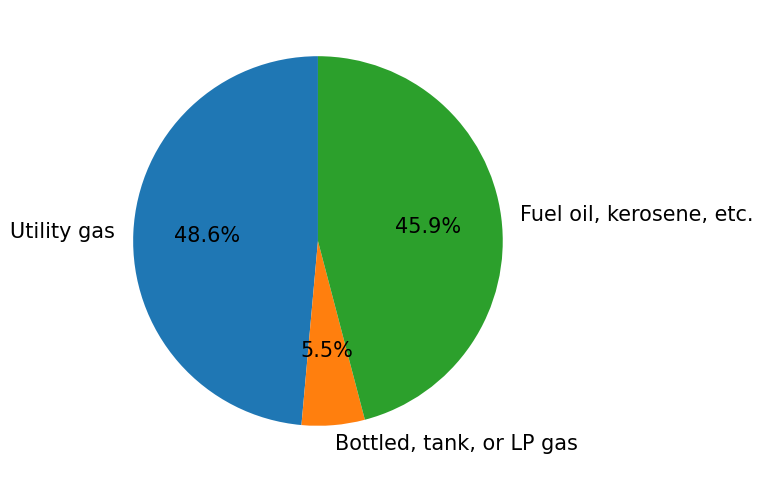

In [6]:
BSN = df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(BSN, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
plt.savefig('../../../figures/BSN-household-fuel.png', dpi=600, bbox_inches='tight')

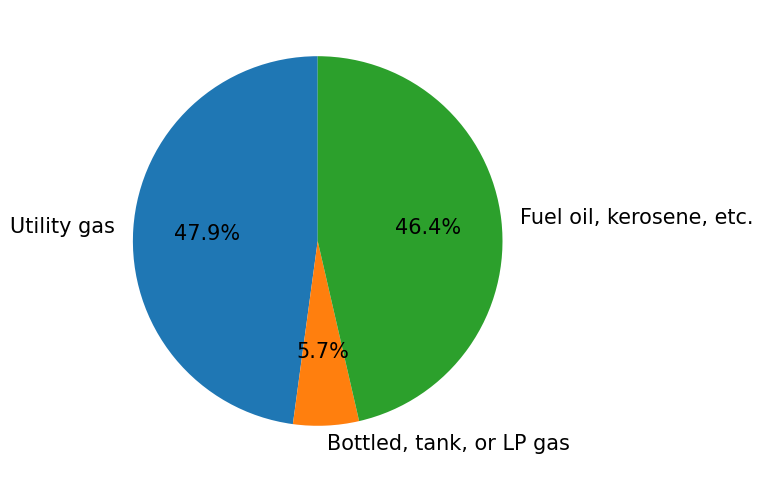

In [7]:
HEM = df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(HEM, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})

plt.savefig('../../../figures/HEM-household-fuel.png', dpi=600, bbox_inches='tight')

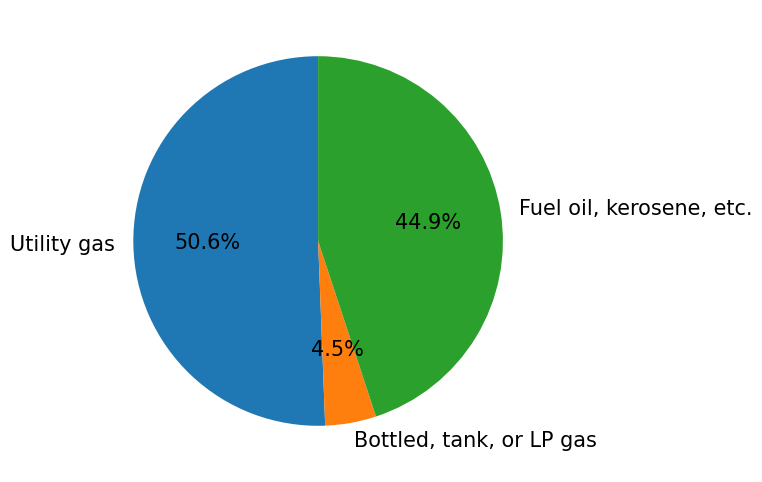

In [8]:
NHM = df_household_fuel['New Haven-Milford, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(NHM, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
plt.savefig('../../../figures/NHM-household-fuel.png', dpi=600, bbox_inches='tight')


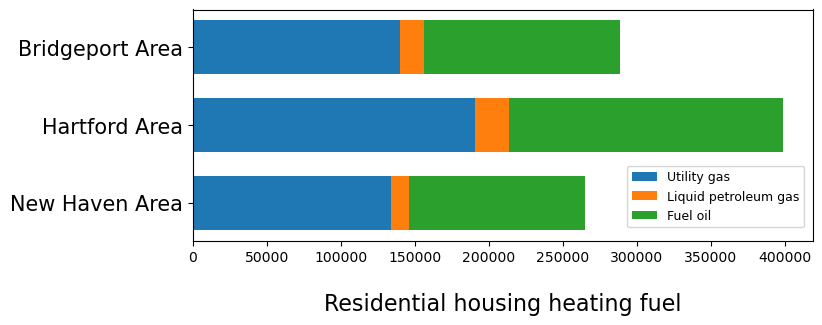

In [9]:
plt.figure(figsize=(8, 3))
X = ['Bridgeport Area','Hartford Area', 'New Haven Area']

utility_gas = df_household_fuel.iloc[0][2:5]   # NH, HH, BSN
propane = df_household_fuel.iloc[1][2:5] 
fuel_oil = df_household_fuel.iloc[2][2:5]    # Add your third set of data

utility_gas = pd.to_numeric(utility_gas, errors='coerce')
propane = pd.to_numeric(propane, errors='coerce')
fuel_oil = pd.to_numeric(fuel_oil, errors='coerce')

X = X[::-1]
utility_gas = utility_gas[::-1]
propane = propane[::-1]
fuel_oil = fuel_oil[::-1]

bar_width = 0.7  # Width of each bar

# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, utility_gas, label='Utility gas', height=bar_width)
plt.barh(X, propane, left=utility_gas, label='Liquid petroleum gas', height=bar_width)
plt.barh(X, fuel_oil, left=utility_gas + propane, label='Fuel oil', height=bar_width)


plt.xlabel("Residential housing heating fuel",fontsize=16, labelpad=20)
plt.xticks(fontsize=10)  # Adjust the font size as needed
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.69, 0.35), fontsize=9)

plt.savefig('../../../figures/Report-images/AG-land-area.png', dpi=600,bbox_inches='tight')

In [10]:
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide,Statewide Energy consumption,BSN Energy consumption,HEM Energy consumption,NHM Energy consumption,Energy consumption unit,Emissions factor unit,CO2,CH4,N2O
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691,36900.0,10447.552689,14203.394762,9988.504497,million cf,g (Gas)/scf,54.44,0.00,0.00
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712,54.3,13.433251,19.325117,9.975587,million gallons,g (Gas)/gallon,5720.00,0.27,0.05
2,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861,345.7,83.095124,115.882989,74.623292,million gallons,g (Gas)/gallon,10150.00,0.41,0.08


In [18]:
#calculate the residential emissions in each MSA
BSN_total_emissions = df_household_fuel["BSN Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)
HEM_total_emissions = df_household_fuel["HEM Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)
NHM_total_emissions = df_household_fuel["NHM Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)

BSN_total_emissions.sum() #MTCO2e
HEM_total_emissions.sum()
NHM_total_emissions.sum()

1361020.8392503595

In [20]:
df_household_fuel["NHM Energy consumption"]
BSN_total_emissions

0    568764.768379
1     77129.025483
2    846248.226170
dtype: float64

In [12]:
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide,Statewide Energy consumption,BSN Energy consumption,HEM Energy consumption,NHM Energy consumption,Energy consumption unit,Emissions factor unit,CO2,CH4,N2O
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691,36900.0,10447.552689,14203.394762,9988.504497,million cf,g (Gas)/scf,54.44,0.00,0.00
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712,54.3,13.433251,19.325117,9.975587,million gallons,g (Gas)/gallon,5720.00,0.27,0.05
2,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861,345.7,83.095124,115.882989,74.623292,million gallons,g (Gas)/gallon,10150.00,0.41,0.08


In [13]:
# Create a DataFrame from the Series
residential_emissions = pd.DataFrame({
    'GHG emissions (MMTCO2e)': [
        NHM_total_emissions.sum()/1000000,
        HEM_total_emissions.sum()/1000000,
        BSN_total_emissions.sum()/1000000
    ]
})
# Create a new index with the same number of elements as the original DataFrame
new_index = ['New Haven-Milford', 'Hartford-east Hartford-Middletown','Bridgeport-Stamford-Norwalk']

# Rename the row index
residential_emissions= residential_emissions.rename(index=dict(zip(residential_emissions.index, new_index)))
residential_emissions['CO2 emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000]
residential_emissions['CH4 emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000]
residential_emissions['N2O emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000]
residential_emissions
#residential_emissions.to_csv('../../../results/residential-energy-emissions-breakdown.csv')

,GHG emissions (MMTCO2e),CO2 emissions (MMTCO2e),CH4 emissions (MMTCO2e),N2O emissions (MMTCO2e)
New Haven-Milford,1.361021,1.358261,0.000832,0.001928
Hartford-east Hartford-Middletown,2.064354,2.059985,0.001318,0.003051
Bridgeport-Stamford-Norwalk,1.492142,1.489018,0.000942,0.002181


In [14]:
# Create a DataFrame from the Series
emissions = pd.DataFrame({'BSN': BSN_total_emissions/1000000, 'HEM': HEM_total_emissions/1000000, 'NHM':NHM_total_emissions/1000000})

# Create a new index with the same number of elements as the original DataFrame
new_index = ['Natural gas', 'Propane','Fuel oil','Fuel oil']

# Rename the row index
emissions= emissions.rename(index=dict(zip(emissions.index, new_index)))

residential_emissions
residential_emissions.to_csv('../../../results/sectors/residential-emissions-breakdown-by-gas.csv')

In [15]:
column_sums = emissions.sum()

# If you want to add a new row with the column sums to the DataFrame
total_row = pd.DataFrame(column_sums).T.rename(index={0: 'Total (MMTCO2e)'})
emissions = pd.concat([emissions, total_row])
emissions.to_csv('../../../results/sectors/residential-emissions-breakdown-by-fuel.csv')
emissions

,BSN,HEM,NHM
Natural gas,0.568765,0.773233,0.543774
Propane,0.077129,0.110958,0.057276
Fuel oil,0.846248,1.180163,0.759970
Total (MMTCO2e),1.492142,2.064354,1.361021


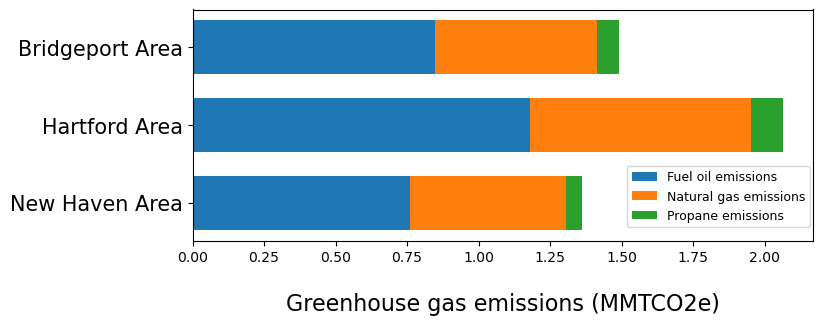

In [16]:
plt.figure(figsize=(8, 3))
X = ['Bridgeport Area','Hartford Area', 'New Haven Area']

NG = emissions.iloc[0][0:3]#NH, HH, BSN
Propane = emissions.iloc[1][0:3]
Fuel = emissions.iloc[2][0:3]

X = X[::-1]
NG = NG[::-1]
Propane = Propane[::-1]
Fuel = Fuel[::-1]

bar_width = 0.7  # Width of each bar
# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, Fuel, label='Fuel oil emissions', height=bar_width)
plt.barh(X, NG, left=Fuel, label='Natural gas emissions', height=bar_width)
plt.barh(X, Propane, left=Fuel + NG, label='Propane emissions', height=bar_width)

plt.xlabel("Greenhouse gas emissions (MMTCO2e)",fontsize=16, labelpad=20)
plt.xticks(fontsize=10)  # Adjust the font size as needed
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.69, 0.35), fontsize=9)

plt.savefig('../../../figures/Report-images/residential-emissions.png', dpi=600,bbox_inches='tight')

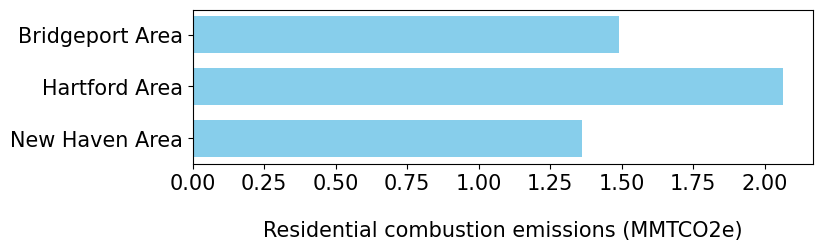

In [17]:
plt.figure(figsize=(8, 2))
X = ['Bridgeport Area','Hartford Area', 'New Haven Area']
values = emissions.iloc[3]

X=X[::-1]
values=values[::-1]

plt.barh(X, values, 0.7,color='skyblue')
plt.xlabel('Residential combustion emissions (MMTCO2e)', fontsize=15,labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)


plt.savefig('../../../figures/Report-images/residential-MSA-emissions.png', dpi=600,bbox_inches='tight')